In [13]:
import warnings
warnings.filterwarnings('ignore')
import sys  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv("titanic_train.csv")
#dummy variable
# 1 hot encoding
def oneHotEncoding(data, target):
    output=[]
    for i in data:
        if i == target or i == str(target):
            output+=[1]
        else:
            output+=[0]
    return output

train.head(20)

ModuleNotFoundError: No module named 'matplotlib'

In [7]:
!pip3 install matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
train.isnull().sum()

NameError: name 'train' is not defined

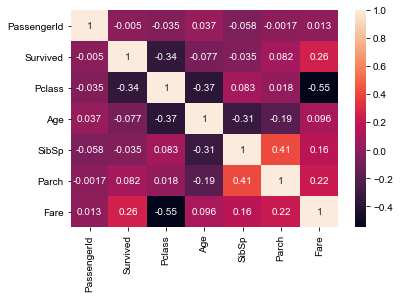

In [ ]:
sns.heatmap(train.corr(), annot=True)
sns.set(rc={'figure.figsize':(12,9)})

**BEGIN FEATURE ENGINEERING**

**NEW FEATURE FOR GENDER**

In [ ]:
#Check male vs. female survival rate
sex = train.groupby("Sex")["Survived"].mean()
sex.head()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

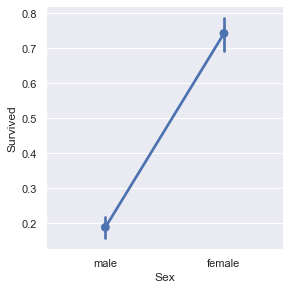

In [ ]:
#chances of surviving for females are much higher than males
sns.factorplot("Sex","Survived",data=train,size=4)
#This can be visualized in the graph

In [ ]:
#add column to make female and male into binary numbers
sexbinary = []

for i in train["Sex"]:
    if i == "female":
        sexbinary+= [0]
    else:
        sexbinary+= [1]

#add features for male and female

train["Female"] = oneHotEncoding(sexbinary, 0)
train["Male"] = oneHotEncoding(sexbinary, 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


**NEW FEATURE FOR FAMILY SIZE**

In [ ]:
#add column for whole family
train["Whole Family"] = train["Parch"] + train["SibSp"] + 1

In [ ]:
train["Whole Family"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Whole Family, dtype: int64

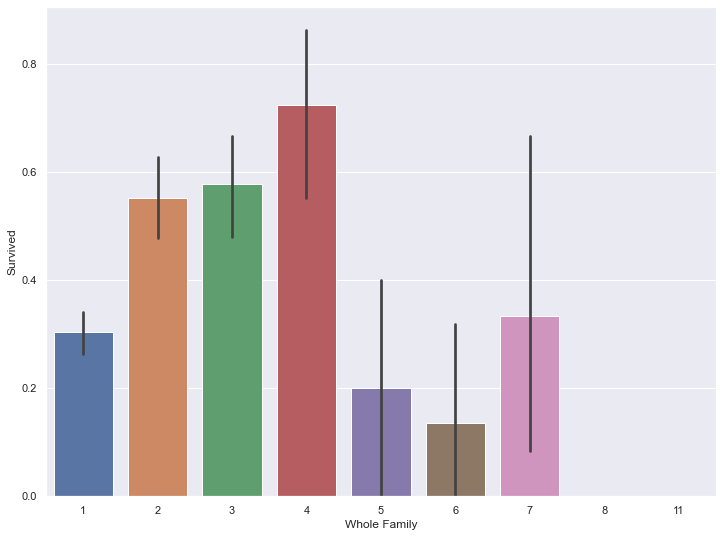

In [ ]:
#From this we see that families of 4 were the most likely to survive
#while families of 6 were least likely to survive
sns.barplot(x="Whole Family",y="Survived",data=train)

In [ ]:
#add features for family size

train['FamSmall'] = train['Whole Family'].map(lambda s: 1 if  s <= 2  else 0)
train["FamMedium"] = train["Whole Family"].map(lambda s: 1 if 2<s<=5 else 0)
train["FamLarge"] = train["Whole Family"].map(lambda s: 1 if s>5 else 0)

**NEW FEATURE FOR AGE**

In [ ]:
values_age = train["Age"].value_counts()
values_age

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
len(values_age.index)

88

(array([14., 10.,  6., 10.,  4.,  3.,  3.,  4.,  8.,  2.,  4.,  1.,  2.,
         6.,  6., 17., 13., 26., 25., 15., 25., 27., 15., 31., 24., 18.,
        18., 25., 22., 25., 19., 18., 17., 15., 19., 22.,  7., 11., 14.,
        13.,  8., 13.,  5.,  9., 12.,  5.,  9.,  9.,  6., 10.,  7.,  6.,
         1.,  8.,  2.,  5.,  2.,  5.,  2.,  4.,  3.,  4.,  2.,  2.,  3.,
         1.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([ 0.42   ,  1.41475,  2.4095 ,  3.40425,  4.399  ,  5.39375,
         6.3885 ,  7.38325,  8.378  ,  9.37275, 10.3675 , 11.36225,
        12.357  , 13.35175, 14.3465 , 15.34125, 16.336  , 17.33075,
        18.3255 , 19.32025, 20.315  , 21.30975, 22.3045 , 23.29925,
        24.294  , 25.28875, 26.2835 , 27.27825, 28.273  , 29.26775,
        30.2625 , 31.25725, 32.252  , 33.24675, 34.2415 , 35.23625,
        36.231  , 37.22575, 38.2205 , 39.21525, 40.21   , 41.20475,
        42.1995 , 43.19425, 44.189  , 45.18375, 46.1785 , 47.17325

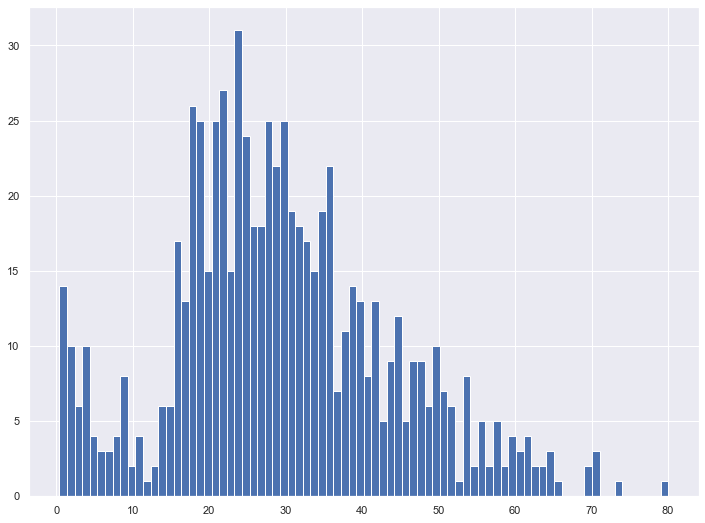

In [ ]:
plt.hist(train["Age"], bins = 80)

In [ ]:
print("Median age: ",train["Age"].median())


Median age:  28.0


In [ ]:
train["Age"]=train["Age"].fillna(value=train["Age"][train["Age"].notnull()].median())

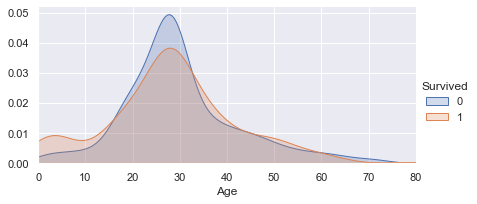

In [ ]:
s = sns.FacetGrid(train, hue="Survived",aspect=2)
s.map(sns.kdeplot,"Age",shade=True)
s.set(xlim = (0,train["Age"].max()))
s.add_legend()

#From this, we see that people aged 15-30 and people aged 
#60-80 were more likely to die than survive. People of all 
#other ages were more likely to survive. 

In [ ]:
train['AgeGroups'] = pd.cut(train['Age'], 4)
train[["AgeGroups", "Survived"]].groupby(['AgeGroups'], as_index=False).mean()

,AgeGroups,Survived
0,"(0.34, 20.315]",0.458101
1,"(20.315, 40.21]",0.364769
2,"(40.21, 60.105]",0.390625
3,"(60.105, 80.0]",0.227273


In [ ]:
train["Age"][(train["Age"]<=18)]=0
train["Age"][(train["Age"]>18) & (train["Age"]<=40.21)]=1
train["Age"][(train["Age"]>40.21) & (train["Age"]<=60.105)]=2
train["Age"][(train["Age"]>60.105) & (train["Age"]<=80)]=3

In [ ]:
#add age sections to the dataframe

train["Child"] = oneHotEncoding(train["Age"],0)
train["Young_adult"] = oneHotEncoding(train["Age"],1)
train["Middle_age"] = oneHotEncoding(train["Age"],2)
train["Old_age"] = oneHotEncoding(train["Age"],3)

**NEW FEATURE FOR FARE**

R value between Fare and Survival Chances:  0.29043232184019385


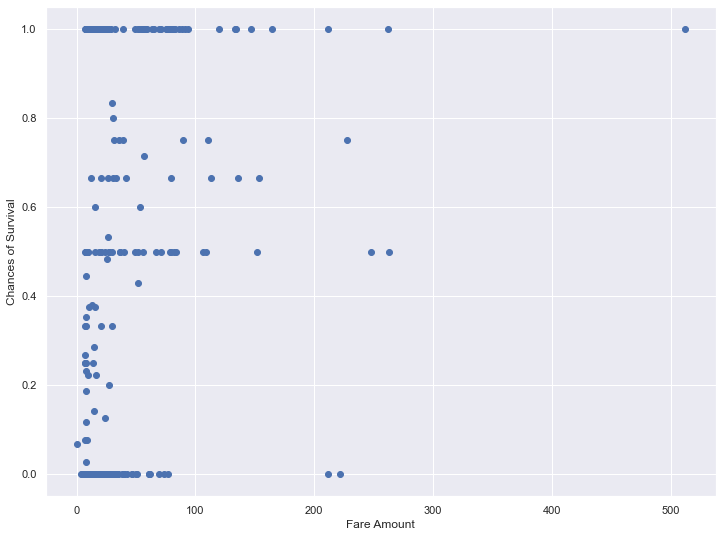

In [ ]:
#this manipulation shows a scatter plot of the fares and
#their respective chances of survival

fare_average = train.groupby("Fare")["Survived"].mean()

fares=[]
survival_chances=[]
fare_dict={}

for i in fare_average.index:
    fares+=[i]
for i in fare_average:
    survival_chances+=[i]
for i in range(len(fare_average)):
    fare_dict[fares[i]] = survival_chances[i]

groupby_sorted = sorted(fare_dict.items(), key=lambda x: x[1], reverse=True)
table1 = pd.DataFrame(groupby_sorted, columns = ["Fare","Chances of Survival"])

table1["Fare"].value_counts()

plt.scatter(table1["Fare"],table1["Chances of Survival"])
plt.xlabel("Fare Amount")
plt.ylabel("Chances of Survival")

corr = np.corrcoef(table1["Chances of Survival"],table1["Fare"])
print("R value between Fare and Survival Chances: ", corr[0][1])

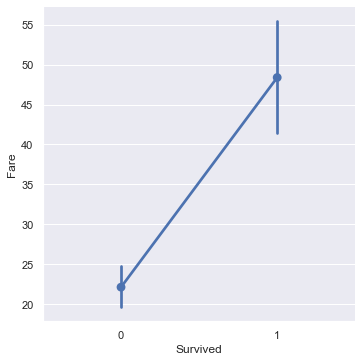

In [ ]:
sns.factorplot("Survived","Fare",data=train,size=5)

#This shows that the average fare of people that did not survive
#is about $23, and the average fare of people that survived is 
#about $50. Smaller fare means less likely to survive.

In [ ]:
train['FareGroups'] = pd.cut(train['Fare'], 4)
train[["FareGroups", "Survived"]].groupby(['FareGroups'], as_index=False).mean()


,FareGroups,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [ ]:
#add fare sizes to the dataframe

train["Fare"][(train["Fare"] <= 128.082)]=0
train["Fare"][(train["Fare"] > 128.082)&(train["Fare"]<= 256.165)]=1
train["Fare"][(train["Fare"] > 256.165)&(train["Fare"]<= 384.247)]=2
train["Fare"][(train["Fare"] > 384.247)&(train["Fare"]<= 512.329)]=3

In [ ]:
fare_small=oneHotEncoding(train["Fare"],0)
fare_medium=oneHotEncoding(train["Fare"],1)
fare_large=oneHotEncoding(train["Fare"],2)
fare_xl=oneHotEncoding(train["Fare"],3)
train["Fare_small"]=fare_small
train["Fare_medium"]=fare_medium
train["Fare_large"]=fare_large
train["Fare_xl"]=fare_xl

**NEW FEATURE FOR PORT**

In [ ]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
port_ints = []

for i in train["Embarked"]:
    if i == "S":
        port_ints += [1]
    elif i == "C":
        port_ints += [2]
    else:
        port_ints += [3]

train["Port Number"] = port_ints

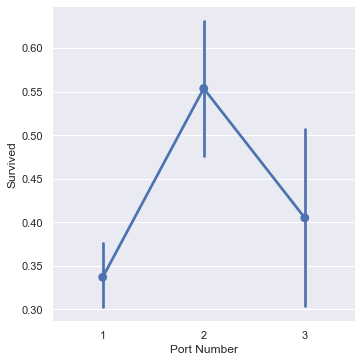

In [ ]:
sns.factorplot("Port Number","Survived",data=train,size=5)

#S-1 - Southampton
#C-2 - Cherbourg
#Q-3 - Queenstown

#As shown by the chart, Cherbourg had the highest 
#rate of survival of the three ports.

In [ ]:
#Ports that the ship embarked from...
#Create feature to make ports into integers
#add features for port        

train["Port_S"] = oneHotEncoding(port_ints,1)
train["Port_C"] = oneHotEncoding(port_ints,2)
train["Port_Q"] = oneHotEncoding(port_ints,3)


**NEW FEATURE FOR TICKET**

In [ ]:
ticketfirstnum=[]

#check to see if ticket number is significant enough to add to model

for i in train["Ticket"]:
    if i[0] == "1":
        ticketfirstnum += [1]
    elif i[0] == "2":
        ticketfirstnum += [2]
    elif i[0] == "3":
        ticketfirstnum += [3]
    else:
        ticketfirstnum += [4];
        
train["Ticket First Number"] = ticketfirstnum
train.groupby("Ticket First Number")["Survived"].mean()

Ticket First Number
1    0.630137
2    0.464481
3    0.239203
4    0.356322
Name: Survived, dtype: float64

In [ ]:
#add features to dataframe
ticketnum1=oneHotEncoding(ticketfirstnum,1)
ticketnum2=oneHotEncoding(ticketfirstnum,2)
ticketnum3=oneHotEncoding(ticketfirstnum,3)
ticketnum4=oneHotEncoding(ticketfirstnum,4)
train["TicketNum1"]=ticketnum1
train["TicketNum2"]=ticketnum2
train["TicketNum3"]=ticketnum3
train["TicketNum4"]=ticketnum4

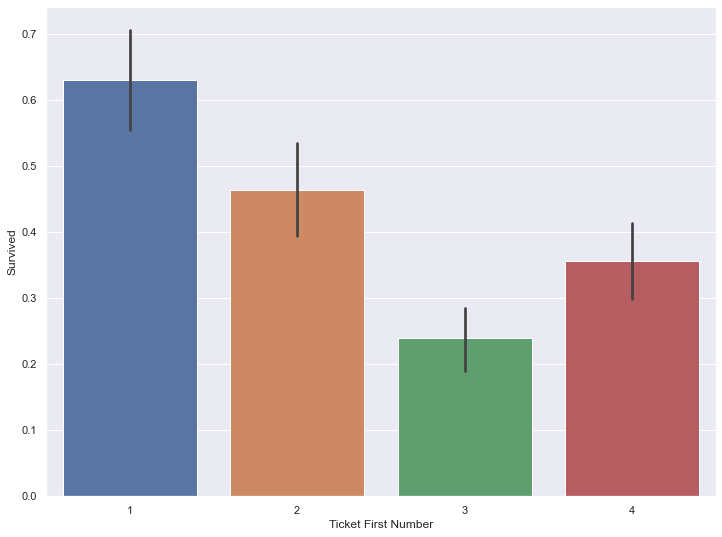

In [ ]:
sns.barplot(x="Ticket First Number", y="Survived",data=train)

**NEW FEATURE FOR CABIN**

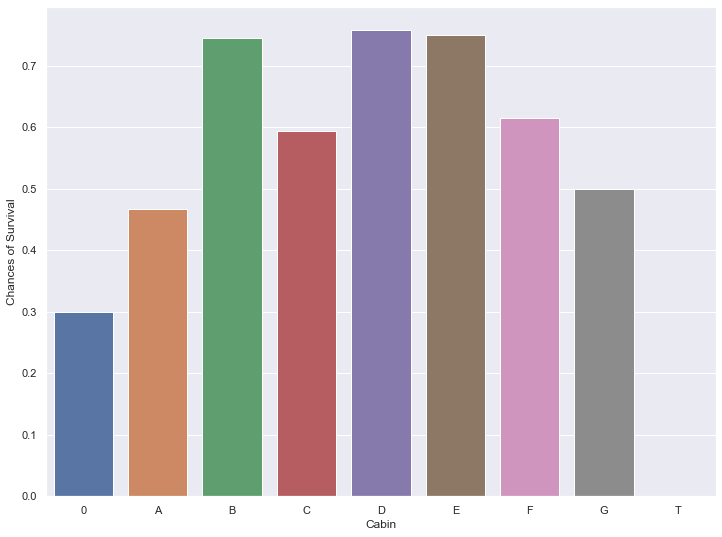

In [ ]:
#this manipulation shows the relationship between cabin section by letter and survival rate

train["Cabin"].fillna("0", inplace=True)
cabin = []
for i in train["Cabin"]:
    if i != 0:
        cabin += [i]
    else:
        cabin += ["None"]
cabin_letter=[]
for i in cabin:
    if i == "None":
        cabin_letter += ["N/A"]
    else:
        cabin_letter += [i[0]]
train["Cabin Section"] = cabin_letter

groupby_cabin = train.groupby("Cabin Section")["Survived"].mean()
sections = []
surv_rate = []
dict1 = {}

for i in groupby_cabin.index:
    sections += [i]
for i in groupby_cabin:
    surv_rate += [i]
for i in range(len(groupby_cabin)):
    dict1[sections[i]] = surv_rate[i]

df = pd.DataFrame(list(dict1.items()),columns = ['Cabin','Chances of Survival']) 
sns.barplot(x="Cabin", y="Chances of Survival", data=df)

In [ ]:
cabinVar=[]
for i in train["Cabin"]:
    if i[0]==0:
        cabinVar += [0]
    else:
        if i[0] == "A":
            cabinVar+=[1]
        elif i[0] == "B":
            cabinVar+=[2]
        elif i[0] == "C":
            cabinVar+=[3]
        elif i[0] == "D":
            cabinVar+=[4]
        elif i[0] == "E":
            cabinVar+=[5]
        elif i[0] == "F":
            cabinVar+=[6]
        elif i[0] == "G":
            cabinVar+=[7]
        else:
            cabinVar+=[0]
train["Cabin Var"]=cabinVar
cabinVarA = oneHotEncoding(train["Cabin Var"],1)
cabinVarB = oneHotEncoding(train["Cabin Var"],2)
cabinVarC = oneHotEncoding(train["Cabin Var"],3)
cabinVarD = oneHotEncoding(train["Cabin Var"],4)
cabinVarE = oneHotEncoding(train["Cabin Var"],5)
cabinVarF = oneHotEncoding(train["Cabin Var"],6)
cabinVarG = oneHotEncoding(train["Cabin Var"],7)
cabinVarNan = oneHotEncoding(train["Cabin Var"],0)
train["CabinVarA"] = cabinVarA
train["CabinVarB"] = cabinVarB
train["CabinVarC"] = cabinVarC
train["CabinVarD"] = cabinVarD
train["CabinVarE"] = cabinVarE
train["CabinVarF"] = cabinVarF
train["CabinVarG"] = cabinVarG
train["CabinVarNan"] = cabinVarNan

**ADD FEATURE FOR PCLASS**

In [ ]:
pclass_1 = oneHotEncoding(train["Pclass"],1)
pclass_2 = oneHotEncoding(train["Pclass"],2)
pclass_3 = oneHotEncoding(train["Pclass"],3)
train["pclass1"]=pclass_1
train["pclass2"]=pclass_2
train["pclass3"]=pclass_3

In [ ]:
train=train.drop(["PassengerId","Name","Sex","SibSp","Parch","Ticket","Cabin","Embarked","Cabin Section",
"Whole Family","Pclass","Cabin Var","AgeGroups","FareGroups","CabinVarNan","Age","Fare"],axis=1)

In [ ]:
train.head(20)

,Survived,Female,Male,FamSmall,FamMedium,FamLarge,Child,Young_adult,Middle_age,Old_age,...,CabinVarA,CabinVarB,CabinVarC,CabinVarD,CabinVarE,CabinVarF,CabinVarG,pclass1,pclass2,pclass3
0,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
7,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
features_list = ["Female","Male","FamSmall","FamMedium","FamLarge",
                 "Child","Young_adult","Middle_age","Old_age","CabinVarA","CabinVarB","CabinVarC",
                 "CabinVarD","CabinVarE","CabinVarF","CabinVarG","TicketNum1","TicketNum2",
                 "TicketNum3","TicketNum4","Port_S","Port_C","Port_Q","Fare_small","Fare_medium",
                "Fare_large","Fare_xl","pclass1","pclass2","pclass3"]

x_train=train[features_list]
y_train=train["Survived"]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
model.score(x_train,y_train)

0.877665544332211

**BEGIN TEST SET**

In [ ]:
test = pd.read_csv("titanic_test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#features:
#pclass, sex, age, family, fare, cabin, embarked, ticket

#pclass is done
tpclass_1 = oneHotEncoding(test["Pclass"],1)
tpclass_2 = oneHotEncoding(test["Pclass"],2)
tpclass_3 = oneHotEncoding(test["Pclass"],3)
test["pclass1"]=tpclass_1
test["pclass2"]=tpclass_2
test["pclass3"]=tpclass_3

In [ ]:
#sex is done
list_fem = []
list_male=[]
for i in test["Sex"]:
    if i == "male":
        list_male += [1]
        list_fem += [0]
    else:
        list_male += [0]
        list_fem += [1]
test["Female"] = list_fem
test["Male"] = list_male

In [ ]:
#age is done

#28 is the median of the train set
test["Age"].fillna(28)

test["Age"][(test["Age"]<=18)]=0
test["Age"][(test["Age"]>18) & (test["Age"]<=40.21)]=1
test["Age"][(test["Age"]>40.21) & (test["Age"]<=60.105)]=2
test["Age"][(test["Age"]>60.105) & (test["Age"]<=80)]=3

test["Child"] = oneHotEncoding(test["Age"],0)
test["Young_adult"] = oneHotEncoding(test["Age"],1)
test["Middle_age"] = oneHotEncoding(test["Age"],2)
test["Old_age"] = oneHotEncoding(test["Age"],3)

In [ ]:
#family is done
test["Whole Family"] = test["Parch"]+test["SibSp"]+1

test['FamSmall'] = test['Whole Family'].map(lambda s: 1 if  s <= 2  else 0)
test["FamMedium"] = test["Whole Family"].map(lambda s: 1 if 2<s<=5 else 0)
test["FamLarge"] = test["Whole Family"].map(lambda s: 1 if s>5 else 0)

In [ ]:
#fare is done
test["Fare"][(test["Fare"] <= 128.082)]=0
test["Fare"][(test["Fare"] > 128.082)&(test["Fare"]<= 256.165)]=1
test["Fare"][(test["Fare"] > 256.165)&(test["Fare"]<= 384.247)]=2
test["Fare"][(test["Fare"] > 384.247)&(test["Fare"]<= 512.329)]=3

fare_small=oneHotEncoding(test["Fare"],0)
fare_medium=oneHotEncoding(test["Fare"],1)
fare_large=oneHotEncoding(test["Fare"],2)
fare_xl=oneHotEncoding(test["Fare"],3)
test["Fare_small"]=fare_small
test["Fare_medium"]=fare_medium
test["Fare_large"]=fare_large
test["Fare_xl"]=fare_xl

In [ ]:
#cabin is done

test["Cabin"].fillna("0", inplace=True)
tcabinVar=[]
for i in test["Cabin"]:
    if i[0]==0:
        tcabinVar += [0]
    else:
        if i[0] == "A":
            tcabinVar+=[1]
        elif i[0] == "B":
            tcabinVar+=[2]
        elif i[0] == "C":
            tcabinVar+=[3]
        elif i[0] == "D":
            tcabinVar+=[4]
        elif i[0] == "E":
            tcabinVar+=[5]
        elif i[0] == "F":
            tcabinVar+=[6]
        elif i[0] == "G":
            tcabinVar+=[7]
        else:
            tcabinVar+=[0]
test["Cabin Var"]=tcabinVar
tcabinVarA = oneHotEncoding(test["Cabin Var"],1)
tcabinVarB = oneHotEncoding(test["Cabin Var"],2)
tcabinVarC = oneHotEncoding(test["Cabin Var"],3)
tcabinVarD = oneHotEncoding(test["Cabin Var"],4)
tcabinVarE = oneHotEncoding(test["Cabin Var"],5)
tcabinVarF = oneHotEncoding(test["Cabin Var"],6)
tcabinVarG = oneHotEncoding(test["Cabin Var"],7)
tcabinVarNan = oneHotEncoding(test["Cabin Var"],0)
test["CabinVarA"] = tcabinVarA
test["CabinVarB"] = tcabinVarB
test["CabinVarC"] = tcabinVarC
test["CabinVarD"] = tcabinVarD
test["CabinVarE"] = tcabinVarE
test["CabinVarF"] = tcabinVarF
test["CabinVarG"] = tcabinVarG
test["CabinVarNan"] = tcabinVarNan

In [ ]:
#port is done
tport_ints = []

for i in test["Embarked"]:
    if i == "S":
        tport_ints += [1]
    elif i == "C":
        tport_ints += [2]
    else:
        tport_ints += [3]
test["Port Number"] = tport_ints
test["Port_S"] = oneHotEncoding(tport_ints,1)
test["Port_C"] = oneHotEncoding(tport_ints,2)
test["Port_Q"] = oneHotEncoding(tport_ints,3)

In [ ]:
#ticket is done
tticketfirstnum=[]
for i in test["Ticket"]:
    if i[0] == "1":
        tticketfirstnum += [1]
    elif i[0] == "2":
        tticketfirstnum += [2]
    elif i[0] == "3":
        tticketfirstnum += [3]
    else:
        tticketfirstnum += [4];
        
test["Ticket First Number"] = tticketfirstnum
tticketnum1=oneHotEncoding(tticketfirstnum,1)
tticketnum2=oneHotEncoding(tticketfirstnum,2)
tticketnum3=oneHotEncoding(tticketfirstnum,3)
tticketnum4=oneHotEncoding(tticketfirstnum,4)
test["TicketNum1"]=tticketnum1
test["TicketNum2"]=tticketnum2
test["TicketNum3"]=tticketnum3
test["TicketNum4"]=tticketnum4

In [ ]:
test=test.drop(["Name","Sex","SibSp","Parch","Ticket","Cabin","Embarked",
"Whole Family","Pclass","Cabin Var","CabinVarNan","Age","Fare","Ticket First Number","Port Number"],axis=1)

In [ ]:
test

,PassengerId,pclass1,pclass2,pclass3,Female,Male,Child,Young_adult,Middle_age,Old_age,...,CabinVarE,CabinVarF,CabinVarG,Port_S,Port_C,Port_Q,TicketNum1,TicketNum2,TicketNum3,TicketNum4
0,892,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,893,0,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,894,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,895,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,896,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
414,1306,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
415,1307,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
416,1308,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
features_list = ["Female","Male","FamSmall","FamMedium","FamLarge",
                 "Child","Young_adult","Middle_age","Old_age","CabinVarA","CabinVarB","CabinVarC",
                 "CabinVarD","CabinVarE","CabinVarF","CabinVarG","TicketNum1","TicketNum2",
                 "TicketNum3","TicketNum4","Port_S","Port_C","Port_Q","Fare_small","Fare_medium",
                "Fare_large","Fare_xl","pclass1","pclass2","pclass3"]

x_test = features_list

In [ ]:
#Make a random forest with the decision trees and bootstrap sampling

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)

forest.fit(x_train, y_train)

print("accuracy on training set: %f" % forest.score(x_train, y_train))


accuracy on training set: 0.877666


In [ ]:
import pickle

pickled_model = pickle.dump(model, open('titanic_model.pkl', 'wb'))
print(pickled_model)

None


In [ ]:
prediction = model.predict(test[features_list])

In [ ]:
final_df = pd.DataFrame(index = None)
final_df["PassengerId"] = test["PassengerId"]
final_df["Survived"] = prediction

In [ ]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
